# A Simple Network in Keras

TensorFlow provides a wealth of functions to develop complex mathematical and machine learning programs.
In a sense, it is a powerful library for matrix (or tensor) manipulation with support for automatic
differentiation of functions.

However, using these more fundamental building blocks to develop complex deep neural networks is quite cumbersome.
To ease development and allow to focus on the actual machine learning model, TensorFlow supports a 
high level interfaces:
   * Keras

The Keras API allows us to define, train, and use a deep neural network with a compact syntax.
The main steps are:

* define the model
* compile the model
* start the training with ```model.fit(...)```
* get the predictions with ```model.predict(...)```


This example will use the popular "Iris" dataset.

The [Iris dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) was [originally introduced](http://en.wikipedia.org/wiki/Iris_flower_data_set) by Sir Robert Fisher in 1936 as an example for discriminant analysis.
The data focus on how to discriminate between three different types of the [iris flower](http://en.wikipedia.org/wiki/Iris_(plant):

* Setosa, 
* Versicolour and
* Virginica

Each row in the dataset contains the following features (measured in cm):

* Sepal Length, 
* Sepal Width, 
* Petal Length and 
* Petal Width.

The labels (true values) are mapped as integers in $[0,1,2]$ for the three different flower types.

As this is a popular dataset, it is contained in various machine learning packages.
Here we use the data from the [SciKit-Learn](https://scikit-learn.org/stable/) machine learning suite.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

%pylab inline
# large figures
rcParams['figure.figsize'] = 8, 6
print(tf.__version__)

2023-01-17 22:34:56.404294: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-17 22:34:57.341985: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/francesco/Downloads/cuda/lib64:/usr/local/cuda-11.2/lib64
2023-01-17 22:34:57.342075: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/francesco/Downloads/cuda/lib64:/usr/local/cuda-11.2/lib64
20

Populating the interactive namespace from numpy and matplotlib
2.11.0


As this is a popular training dataset, a convenient load function is provided to access it.

In [2]:
iris = load_iris()

### Building a Network in Keras

In this example we will use a very simple neural network.
The input layer has 4 nodes, correspondingn to the 4 feature variables in each row of the dataset.
The output layer has 3 nodes, corresponding to the 3 types of iris flowers we want to identify.

We then use two hidden layers with 10 nodes each - we could also use different settings, e.g. only one layer or more than two layers with different numbers of hidden nodes. The best setup depends on the problem we wish to analyse.

The main way to build models in Keras is to "stack" layers on top of each other, this is
done in the ```tf.keras.Sequential()``` model.

We will use ReLU as an activation function.
Note that we have specified the shape in the first network layer so the model knows what to expect
when we pass the data to it.

In [3]:
n_input = 4
n_output = 3
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(n_input,)))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(n_output))
model.summary()

2023-01-17 22:34:58.615632: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 22:34:58.624858: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 22:34:58.625269: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


2023-01-17 22:34:58.626876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-17 22:34:58.627811: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 22:34:58.628199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 22:34:58.628541: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on

We can also get a graphical representation of the model with its dependencies:

(note: this requires that the ```graphviz``` package is installed on the Linux system)

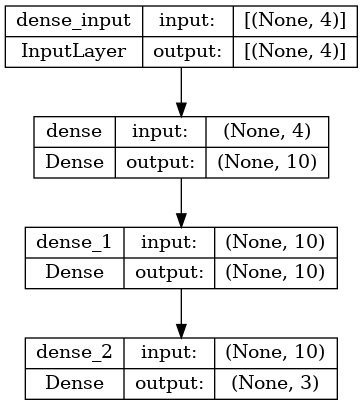

In [4]:
tf.keras.utils.plot_model(model, 'model.png',show_shapes=True)

Before we use the model we need to specify which optimizer and loss function the training process should use and which metrics should be evaluated.

The key concept behind Keras is that these details are determined beforehand when the model is "compiled" so that the training loop knows about them.

We need to define the following things:
* The loss function: This determines how the training process should evaluate whether the prediction made by the model is correct or not. As we have categorical data (three types of iris flowers) which we wish to classify, we use the [sparse categorical cross entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)
* The optimizer. Several choices exist, as a good practice, the Adam Optimizer (see the [paper](https://arxiv.org/abs/1412.6980)
and the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) for more details) is a good starting point


In [5]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

The training process is then started by calling the ```fit``` method.
That's it - the convenience function ```fit``` hides all details for us.
The fit function returns a history object from which we can retrieve various training metrics.

In [6]:
history = model.fit(
        x=iris.data,
        y=iris.target,
        batch_size=32,
        epochs=50,
        verbose=1
    )

Epoch 1/50


2023-01-17 22:35:00.785219: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1d9cd810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-01-17 22:35:00.785257: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2023-01-17 22:35:00.791165: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-01-17 22:35:00.955774: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 2s 5ms/step - loss: 1.5353 - sparse_categorical_accuracy: 0.6667
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 0.9111 - sparse_categorical_accuracy: 0.6733
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 0.7223 - sparse_categorical_accuracy: 0.8667
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6001 - sparse_categorical_accuracy: 0.7600
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5076 - sparse_categorical_accuracy: 0.8267
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4540 - sparse_categorical_accuracy: 0.9533
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3860 - sparse_categorical_accuracy: 0.9133
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3386 - sparse_categorical_accuracy: 0.9733
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3037 - sparse_categ

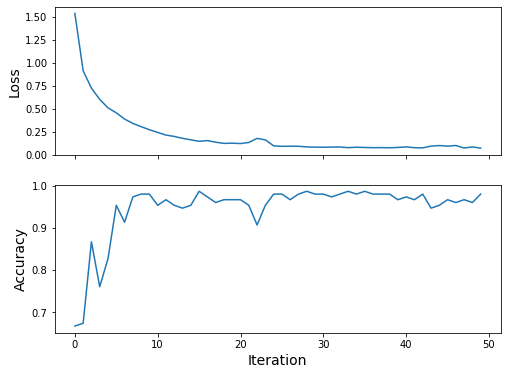

In [7]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
acc_values = history_dict['sparse_categorical_accuracy']
epochs = range(1, len(loss_values) + 1)

fig, axes = plt.subplots(2, sharex=True)
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(loss_values)
axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Iteration", fontsize=14)
axes[1].plot(acc_values)
plt.show()


As we can see, the network does not improve much beyond training epoch 15 or so and reaches a plateau of approximately 98% accuracy.
We can then use the ```predict()``` method to feed data to the trained model and obtain predictions for future or unknown data.

(As this is small dataset, we have not split between training and test data and, thus, also use the training data for 
evaluation. In a real project we would of course not do that...)

In [8]:
predictions=model.predict(iris.data)

5/5 [==============================] - 0s 2ms/step


Remember that we have three output nodes, each corresponding to one of the three label types (i.e. types of iris flowers).
We assign the predicted class as the one where the node in the output layer has the highest value.


For example, the first data point is:

In [9]:
print(predictions[0])

[  6.934799     0.48015887 -19.908718  ]


and the first node has the highest value. Hence we use '0' as the predicted label.

In [10]:
predicted_labels = tf.argmax(predictions, axis=1)
print("Prediction: {}".format(predicted_labels))
print("    Labels: {}".format(iris.target))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]
    Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Since the dataset is so small, we can go through each prediction manually.
However, it is much easier to look at the confusion matrix, comparing
true and predicted labels.

[[50  0  0]
 [ 0 49  1]
 [ 0  2 48]]


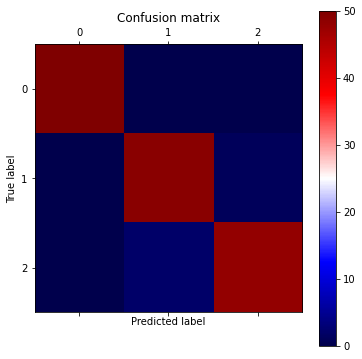

In [11]:
# Compute confusion matrix
cm = confusion_matrix(iris.target,predicted_labels)

print(cm)

# Show confusion matrix 
plt.matshow(cm, cmap='seismic')
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()